In [18]:
import os
import re

from PIL import Image
import pandas as pd
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pwd

'D:\\Pierre-Elliott\\Projets\\ksc\\training\\notebooks'

In [3]:
KS_IMAGES_PATH = "../../../ksc-data/images"  # By default, in a sibling directory to the current project (ie, <project>/training/notebooks)

In [4]:
images_list = os.listdir(os.path.join(*KS_IMAGES_PATH.split('/')))

In [5]:
df = pd.DataFrame(images_list, columns=["filename"])

In [6]:
df.head()

,filename
0,Ia_SEC_1.jpg
1,Ia_SEC_10.jpg
2,Ia_SEC_11.jpg
3,Ia_SEC_12.jpg
4,Ia_SEC_13.jpg


In [7]:
df['stone_class'] = list(map(lambda x: x.split('_')[0], df.filename.values))

In [8]:
df['class_level_1'] = list(map(lambda x: re.sub(r'[a-z0-9]', '', x), df.stone_class.values))

In [9]:
df['class_level_2'] = list(map(lambda x: re.sub(r'[A-Z]', '', x), df.stone_class.values))

In [10]:
df['SUR'] = list(map(lambda x: 'SUR' in x, df.filename.values))
df['SEC'] = list(map(lambda x: 'SEC' in x, df.filename.values))

In [11]:
df['filetype'] = list(map(lambda x: x.split(".")[1], df.filename.values))

In [12]:
df

,filename,stone_class,class_level_1,class_level_2,SUR,SEC,filetype
0,Ia_SEC_1.jpg,Ia,I,a,False,True,jpg
1,Ia_SEC_10.jpg,Ia,I,a,False,True,jpg
2,Ia_SEC_11.jpg,Ia,I,a,False,True,jpg
3,Ia_SEC_12.jpg,Ia,I,a,False,True,jpg
4,Ia_SEC_13.jpg,Ia,I,a,False,True,jpg
...,...,...,...,...,...,...,...
198,VIa_SEC_4.png,VIa,VI,a,False,True,png
199,VIa_SUR_1.png,VIa,VI,a,True,False,png
200,VIa_SUR_2.png,VIa,VI,a,True,False,png
201,VIa_SUR_3.png,VIa,VI,a,True,False,png


In [13]:
df.groupby('stone_class', sort=False).count().filename

stone_class
Ia      54
Ib       8
Ic       2
Id       8
Ie       6
IIa      4
IIb     28
IIIa     6
IIIb    32
IVa1     8
IVa2     3
IVb      8
IVc      8
IVd     10
Va      10
VIa      8
Name: filename, dtype: int64

In [16]:
def annotate(ax):
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

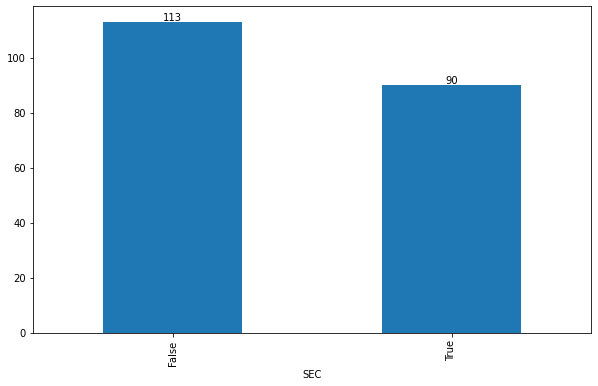

In [30]:
ax = df.groupby('SEC').count().filename.plot.bar(figsize=(10, 6));
annotate(ax)

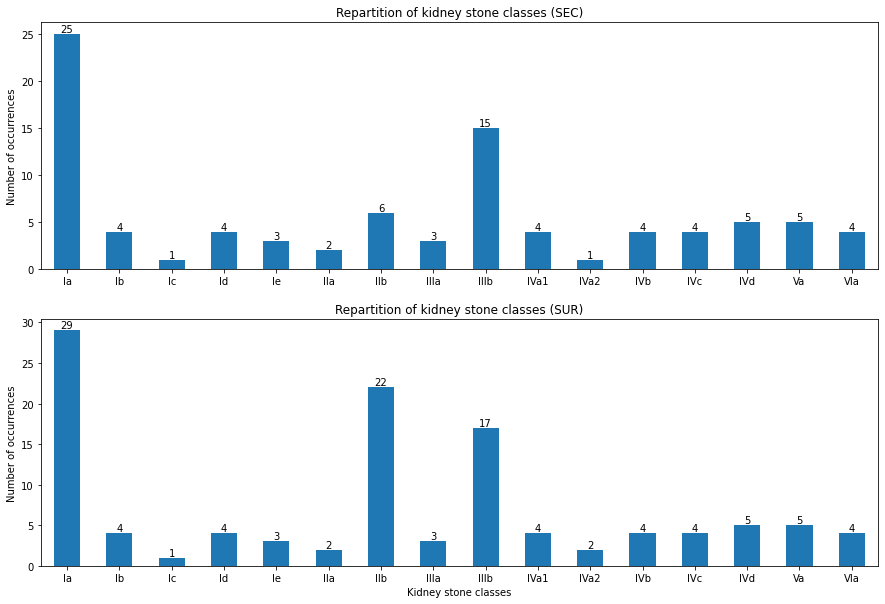

In [34]:
fig, axes = plt.subplots(figsize=(15,10), nrows=2)
for idx, stone_type in enumerate(['SEC', 'SUR']):
    stone_classes_repartition = df[df[stone_type]].groupby('stone_class', sort=False).count().filename
    ax = stone_classes_repartition.plot.bar(rot=0, ax=axes[idx], xlabel='')
    ax.set_ylabel('Number of occurrences')
    ax.set_title(f'Repartition of kidney stone classes ({stone_type})')
    annotate(ax)
ax.set_xlabel('Kidney stone classes');

In [110]:
df.to_csv(os.path.join(*'../dataset.csv'.split('/')), index=False)